*__Alejandro Gonzalez Garcia__
<br>
Date: Feb. 2, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 10: Iterative sampling</font></center>

## <font color=#46769B>Introduction</font>

Normal distributions are one of the key tools for sampling.
With importance sampling, we can study a wide range of general multivariate distributions by sampling from normal distributions. But how do you know what parameters to use for the proposal distribution? Is there an optimal choice for the mean $\mu$ and standard deviation $\sigma$?

The answer is yes *BUT* you may not know what to choose ahead of time. You can figure it out iteratively.

For the case of a univariate distribution $P(x)$, the iterative process is:
- Try a guess for $\mu$ and $\sigma$ for your proposal distribution $Q(x)$.
- Using importance sampling, sample from $Q(x)$ and compute $\langle x \rangle$ and $\Delta x$ with respect to the target distribution $P$ (i.e., the weighted quantities).
- Repeat the process, taking $\langle x \rangle$ and $\Delta x$ as your new guesses for $\mu$ and $\sigma$, respectively.

You can repeat however many times you like until your guesses have converged. Then you can run one last time to get your final numbers.

During each test iteration, you need not have a large number of samples $N$. It may be computationally expensive to compute $P(x)$, so you want to save your resources until your final sampling run. 

The same idea applies in the multivariate case. Here, however, the covariance matrix can also give useful information to improve sampling.

Our goals for this notebook are:
- Practice sampling iteratively
- Practice using the covariance matrix to help in sampling.

Required reading:
- *Lesson 5: Multivariate distributions*



## <font color=#46769B>Part (a)</font>

Consider a target distribution of two variables $x$ and $y$:
$$P(x,y) = \left\{ \begin{array}{cc} A \, x^2 y \, e^{-f(x,y)} & {\rm for \; both} \; x \ge 0 \; {\rm and} \; y \ge 0 \\
0 & {\rm otherwise} \end{array} \right. $$
where $A = 16.04254$ is a normalizing constant and
$$f(x,y) = \frac{1}{2} \left(9 + x^2 - 4 x y + y^2 + x^2 y^2 \right) \, .$$ 
This PDF was purposely chosen to be complicated so that you would not have much intuition about what it looks like, except for the fact that it goes to zero as $x,y \to \infty$.

Consider a proposal distribution $Q(x,y) = \mathcal{N}_x(x) \mathcal{N}_y(y)$, where $\mathcal{N}_{x,y}$ are normal distributions with means $\mu_{x,y}$ and $\sigma_{x,y}$.

Perform the following steps:
- Start from an initial guess $\mu_x = \mu_y = \sigma_x = \sigma_y = 1$. 
- Run a `for` loop 10 times using the following syntax:
```py
for i in range(10):
      # Your code here
```
- Each iteration in your `for` loop, do the following:
    - Generate $N=10^4$ samples from $Q$.
    - Make a weighted 2D histogram corresponding to your target distribution. (Be sure in include `plt.show()` after your `plt.hist2d`. Also, use `density=True`.)
    - Calculate the weighted means $\langle x \rangle$, $\langle y\rangle$ and standard deviations $\Delta x$, $\Delta y$.
    - Make a new proposal distribution, where these values are your new guesses for $\mu_x$, $\mu_y$, $\sigma_x$, $\sigma_y$, respectively.
    - Repeat.
- After the `for` loop, make one final run with $N=10^6$ samples, using your final guesses for $\mu_x$, $\mu_y$, $\sigma_x$, $\sigma_y$. Plot the resulting histogram with a larger number of bins, `bins=[100,100]`.


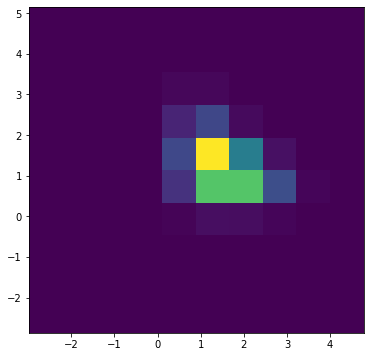

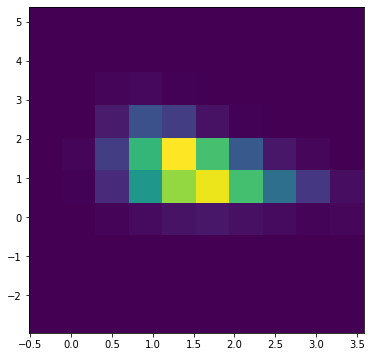

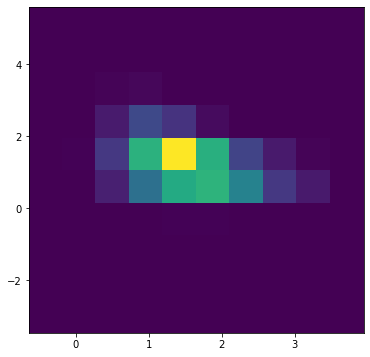

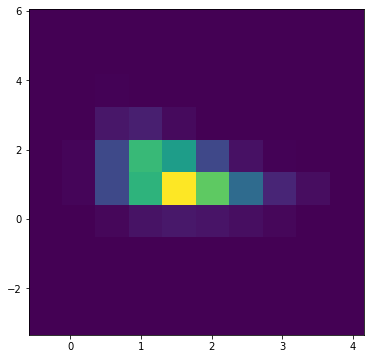

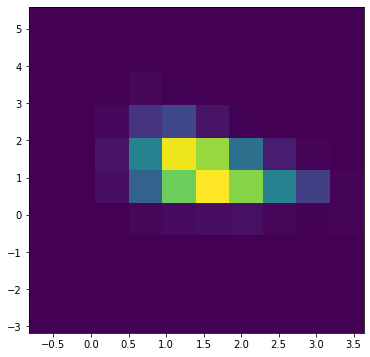

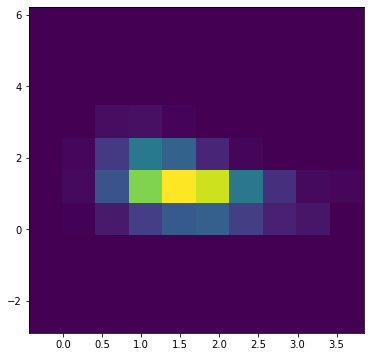

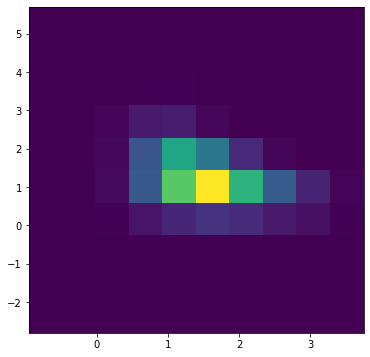

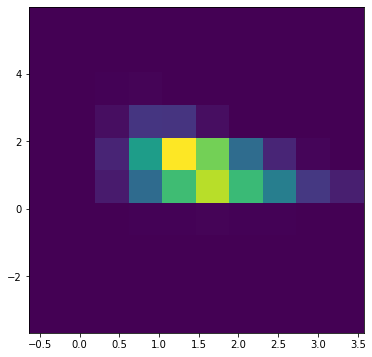

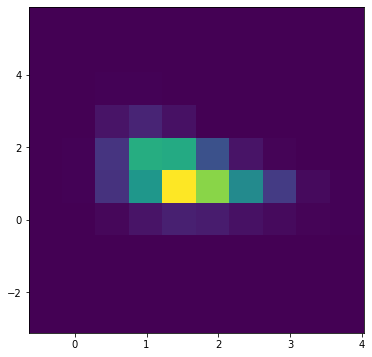

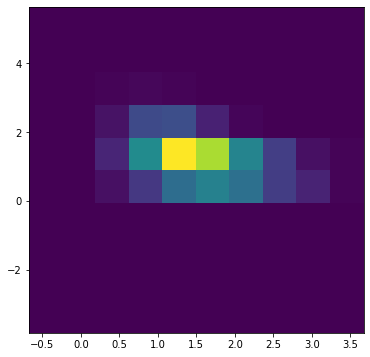

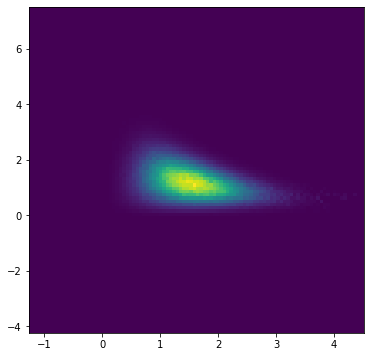

In [2]:
import numpy as np
import matplotlib.pyplot as plt
A = 16.04254

def mean(x, weights=None):
    if weights is not None:
        return np.mean(weights * x)
    else:
        return np.mean(x)


def std(x, weights=None):
    if weights is not None:
        return np.sqrt(np.mean(weights * x ** 2) - np.mean(weights * x) ** 2)
    else:
        return np.std(x)

def p(x,y):
    output = A * x**2 * y * np.exp(-0.5*(9 + x**2 - 4*x*y + y**2 + x**2 * y**2))
    return np.where( (x > 0) & (y > 0) , output, 0)


mean_x = 1
mean_y = 1
sigma_x = 1
sigma_y = 1


def q_x(x):
    return 1/np.sqrt(2*np.pi*sigma_x**2) * np.exp(-0.5*(x-mean_x)**2/sigma_x**2)


def q_y(y):
    return 1/np.sqrt(2*np.pi*sigma_y**2) * np.exp(-0.5*(y-mean_y)**2/sigma_y**2)


for i in range(10):
    N = 10**4
    x_samples = np.random.normal(mean_x,sigma_x,N)
    y_samples = np.random.normal(mean_y,sigma_y,N)
    w = p(x_samples,y_samples) / (q_x(x_samples)*q_y(y_samples))
    plt.figure(figsize=(6,6))
    plt.hist2d(x_samples,y_samples,density=True,weights=w)
    plt.show()
    mean_x = mean(x_samples,weights=w)
    sigma_x = std(x_samples,weights=w)
    mean_y = mean(y_samples,weights=w)
    sigma_y = mean(y_samples,weights=w)


N = 10**6
x_samples = np.random.normal(mean_x,sigma_x,N)
y_samples = np.random.normal(mean_y,sigma_y,N)
w = p(x_samples,y_samples)/(q_x(x_samples)*q_y(y_samples))
bins = [100,100]
plt.figure(figsize=(6,6))
plt.hist2d(x_samples,y_samples,bins=bins,density=True,weights=w)
plt.show()




## <font color=#46769B>Part (b)</font>

Repeat Part (a) with the following modifications:
- Take $Q(x,y)$ to be a multivariate normal distribution that you will sample from using `numpy.random.multivariate_normal(mu,C,num)` where `mu` represents a vector $\vec{\mu} = (\mu_x,\mu_y)$ and `C` is the covariance matrix.
- For your initial run, take $\vec{\mu} = (1,1)$ and $C = \left(\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right)$.
So, you will sample using the following code:
```py
mu = [1,1]
C = [[1,0],[0,1]]
r_samples = np.random.multivariate_normal(mu,C,num)
x_samples = r_samples[:,0]
y_samples = r_samples[:,1]
```
- Proceed with the same ten iterations, using a `for` loop, each with $N=10^4$. For each iteration, you will compute:
    - The weighted means $\langle x \rangle$, $\langle y \rangle$, which you will use as your next guess for $\vec{\mu}$.
    - The weighted covariance matrix $C$ from your samples, which you will use as the next input for $C$ when you sample.
    - Weighted histogram, as in Part (a)
- After the `for` loop, make one final run with $N=10^6$ samples, using your final guesses for $\vec{\mu}$ and $C$. Make your final histogram as in Part (a).

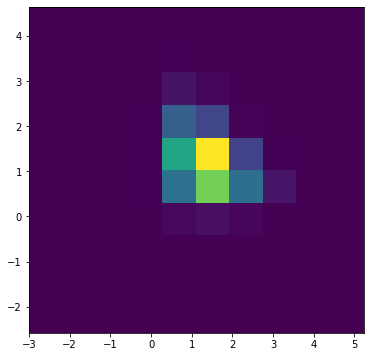

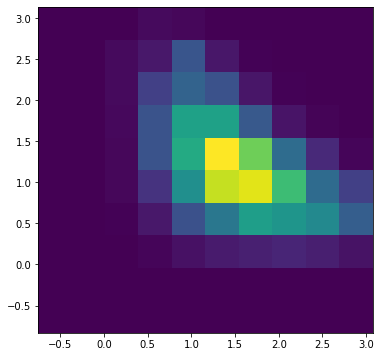

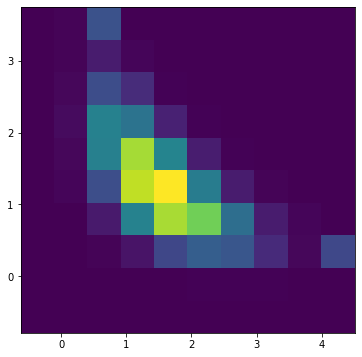

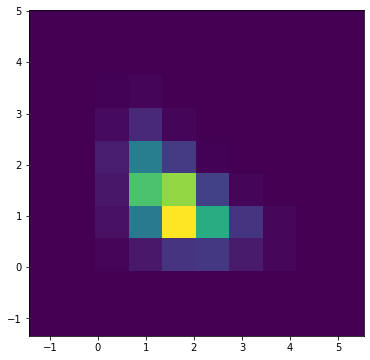

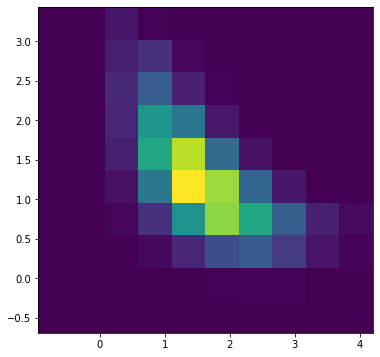

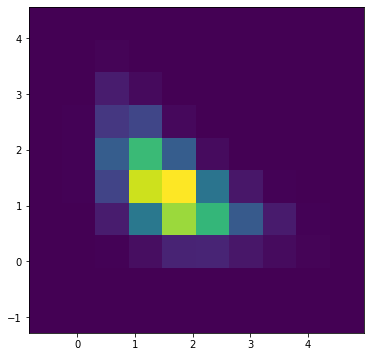

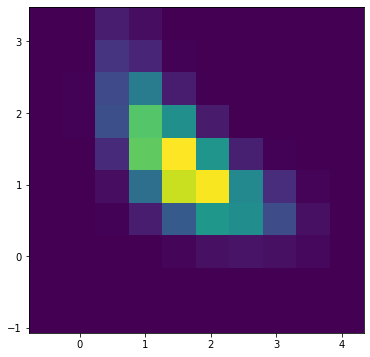

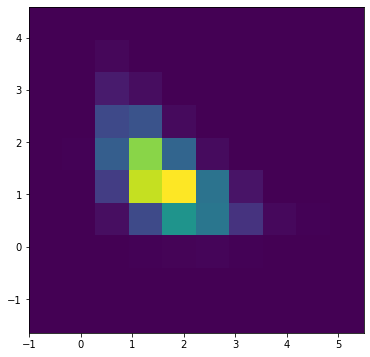

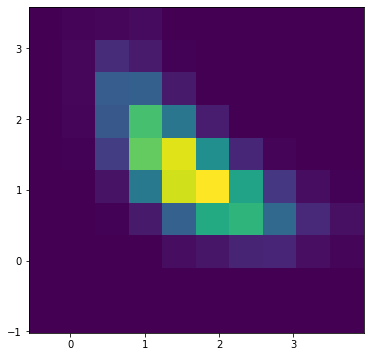

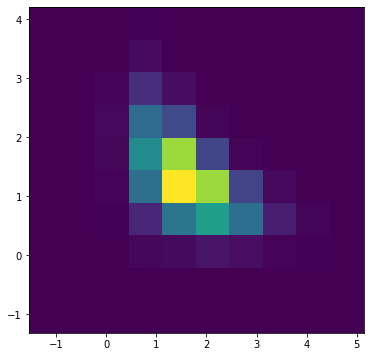

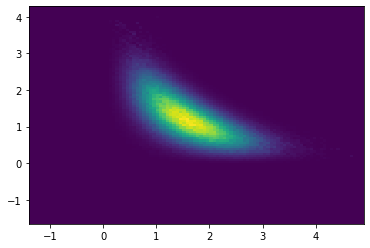

<Figure size 432x432 with 0 Axes>

In [3]:
num = 10**4


def cov_matrix(x, y, weights=None):
    if weights is not None:
        x_mean = np.mean(weights * x)
        y_mean = np.mean(weights * y)

        C_xx = np.mean(weights * (x - x_mean) ** 2)
        C_yy = np.mean(weights * (y - y_mean) ** 2)
        C_xy = np.mean(weights * (x - x_mean) * (y - y_mean))
        return np.array([[C_xx, C_xy], [C_xy, C_yy]])
    else:
        return np.cov(x, y)


mu = [1,1]
C = [[1,0],[0,1]]
for i in range(10):
    r_samples = np.random.multivariate_normal(mu,C,num)
    x_samples = r_samples[:,0]
    y_samples = r_samples[:,1]
    sigma_x = std(x_samples)
    sigma_y = std(y_samples)
    w = p(x_samples,y_samples)/(q_x(x_samples) * q_y(y_samples))
    plt.figure(figsize=(6, 6))
    plt.hist2d(x_samples, y_samples, density=True, weights=w)
    plt.show()
    mean_x=mean(x_samples,weights=w)
    mean_y=mean(y_samples,weights=w)
    mu = [mean_x,mean_y]
    C = cov_matrix(x_samples,y_samples,weights=w)


N = 10**6
r_samples = np.random.multivariate_normal(mu,C,N)
x_samples = r_samples[:,0]
y_samples = r_samples[:,1]
sigma_x = std(x_samples)
sigma_y = std(y_samples)
w = p(x_samples,y_samples)/(q_x(x_samples)*q_y(y_samples))
plt.hist2d(x_samples,y_samples,weights=w,density=True,bins=bins)
plt.figure(figsize=(6,6))
plt.show()